# Master Thesis (Electricity Trading on Intraday Market in Japan)

# Read & interpret dataset

Loading some datasets <p>
Confirming and interpreting it <p>
Preprocessing missing values and outliers on the datasets

In [17]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt #描画ライブラリ
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pathlib
import glob
import math

# Show all the rows and columns up to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## JEPX_Spot_datasets
http://www.jepx.org/market/index.html

In [18]:
# read the dataset (Here, these are re-organised after getting the latest dataset)

#Spot_dataset
df_spot_2016 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2016.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2017 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2017.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2018 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2018.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2019 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2019.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2020 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2020.csv', sep=',', header=0, encoding='shift_jis')

In [20]:
# marge all the spot datasets
df_spot = pd.concat([df_spot_2016, df_spot_2017])
df_spot = pd.concat([df_spot, df_spot_2018])
df_spot = pd.concat([df_spot, df_spot_2019])
df_spot = pd.concat([df_spot, df_spot_2020])

At first pick up only spot price. BUT need to analyse also others

In [21]:
# Pick up some columns
df_spot = df_spot.drop(['エリアプライス北海道(円/kWh)', 'エリアプライス中部(円/kWh)', 'エリアプライス北陸(円/kWh)',
       'エリアプライス関西(円/kWh)', 'エリアプライス中国(円/kWh)', 'エリアプライス四国(円/kWh)',
       'エリアプライス九州(円/kWh)', 'Unnamed: 15', 'スポット・時間前平均価格(円/kWh)',
       'α上限値×スポット・時間前平均価格(円/kWh)', 'α下限値×スポット・時間前平均価格(円/kWh)',
       'α速報値×スポット・時間前平均価格(円/kWh)', 'α確報値×スポット・時間前平均価格(円/kWh)', 'Unnamed: 21',
       '回避可能原価全国値(円/kWh)', '回避可能原価北海道(円/kWh)', '回避可能原価東北(円/kWh)',
       '回避可能原価東京(円/kWh)', '回避可能原価中部(円/kWh)', '回避可能原価北陸(円/kWh)',
       '回避可能原価関西(円/kWh)', '回避可能原価中国(円/kWh)', '回避可能原価四国(円/kWh)',
       '回避可能原価九州(円/kWh)'], axis=1)

In [22]:
# Rename them
df_spot = df_spot.rename(columns={'年月日': 'Date', '時刻コード': 'HH', '売り入札量(kWh)': 'Sell_volume(kWh)',
                                  '買い入札量(kWh)': 'Buy_volume(kWh)', '約定総量(kWh)': 'Total_volume(kWh)', 'システムプライス(円/kWh)': 'System_price(Yen/kWh)', 
                                  'エリアプライス東北(円/kWh)': 'Price_Tohoku(Yen/kWh)','エリアプライス東京(円/kWh)': 'Price_Tokyo(Yen/kWh)'})

In [23]:
# # Apply to_datetime
df_spot["Date"] = pd.to_datetime(df_spot["Date"])

In [24]:
df_spot.head()

,Date,HH,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh)
0,2016-04-01,1,5077000,2120500,675500,6.61,6.69,6.69
1,2016-04-01,2,5621500,2239000,755500,6.34,6.34,6.34
2,2016-04-01,3,5710500,2219000,713500,6.34,6.34,6.34
3,2016-04-01,4,5536000,2202500,717500,6.25,6.03,6.03
4,2016-04-01,5,5461000,2192000,870500,6.57,6.57,6.57


In [25]:
df_spot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84336 entries, 0 to 14207
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   84336 non-null  datetime64[ns]
 1   HH                     84336 non-null  int64         
 2   Sell_volume(kWh)       84336 non-null  int64         
 3   Buy_volume(kWh)        84336 non-null  int64         
 4   Total_volume(kWh)      84336 non-null  int64         
 5   System_price(Yen/kWh)  84336 non-null  float64       
 6   Price_Tohoku(Yen/kWh)  84336 non-null  float64       
 7   Price_Tokyo(Yen/kWh)   84336 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 5.8 MB


- Multiindexを用いた行列調整　https://note.nkmk.me/python-pandas-multiindex-set-reset-sort-swap/

- (参考)　- stack()を用いた列→行への変換方法
https://deepage.net/features/pandas-stack-unstack.html

- pivot_tableの使い方 (stack, unstackも含む)
https://note.nkmk.me/python-pandas-stack-unstack-pivot/

## JEPX_Intra_datasets
http://www.jepx.org/market/index.html

In [26]:
# read the dataset (Here, these are re-organised after getting the latest dataset)

#Intra_dataset
df_intra_2016 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2016.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2017 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2017.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2018 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2018.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2019 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2019.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2020 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2020.csv', sep=',', header=0, encoding='shift_jis')

In [27]:
# marge all the intra datasets
df_intra = pd.concat([df_intra_2016, df_intra_2017])
df_intra = pd.concat([df_intra, df_intra_2018])
df_intra = pd.concat([df_intra, df_intra_2019])
df_intra = pd.concat([df_intra, df_intra_2020])

In [28]:
df_intra = df_intra.rename(columns={'年月日': 'Date', 
                                    '時刻コード': 'HH',
                                    '始値（円/kWh）': 'Open',
                                    '高値（円/kWh）': 'High',
                                    '安値（円/kWh）': 'Low',
                                    '終値（円/kWh）': 'Close',
                                    '平均（円/kWh）': 'Average',
                                    '約定量合計（MWh/h）': 'Volume(MWh/h)',
                                    '約定件数': 'Volume(Tick count)'})

In [29]:
# # Apply to_datetime
df_intra["Date"] = pd.to_datetime(df_intra["Date"])

In [31]:
df_intra.tail()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count)
14148,2021-01-20,37,200.00,203.98,150.00,199.30,186.25,1750.4,239
14149,2021-01-20,38,200.00,203.98,49.00,49.00,181.21,1414.0,244
14150,2021-01-20,39,200.00,200.50,49.00,49.00,176.98,1006.9,197
14151,2021-01-20,40,184.24,190.00,69.89,69.89,159.62,781.6,141
14152,2021-01-20,41,200.00,201.00,69.89,69.89,174.45,1036.4,150


In [32]:
df_intra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84281 entries, 0 to 14152
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                84281 non-null  datetime64[ns]
 1   HH                  84281 non-null  int64         
 2   Open                84209 non-null  float64       
 3   High                84209 non-null  float64       
 4   Low                 84209 non-null  float64       
 5   Close               84209 non-null  float64       
 6   Average             84209 non-null  float64       
 7   Volume(MWh/h)       84209 non-null  float64       
 8   Volume(Tick count)  84281 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 6.4 MB


## Half Hourly time slot

時間の切上げ切り捨てについて
https://www.deep-rain.com/programming/python/1355#i-4

In [35]:
# Make a table for QH_number
df_intra_HH = df_intra.reset_index()
HH_table = pd.DataFrame(df_intra_HH["HH"])
HH_table = HH_table.drop_duplicates()
HH_table['Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').strftime('%H:%M')
HH_table['Time'] = HH_table['Time'].str[-8:]
# HH_table['Hourly_Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').floor("H").strftime('%H:%M')
# HH_table['Hourly_Time'] = pd.to_datetime(HH_table['Hourly_Time']).dt.time

HH_table.head()

,HH,Time
0,1,00:00
1,2,00:30
2,3,01:00
3,4,01:30
4,5,02:00


## Actual_generation(Tohoku_area) ※ "Time"列を使うだけ
https://setsuden.nw.tohoku-epco.co.jp/download.html

Timegrouperで5分値を３０分値へ
https://qiita.com/takechanman1228/items/00daec6a62f831f24e6d

In [44]:
#Actual generation_dataset from 2016-08-01
df_actual_generation_1 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Actual_generation_5min/Actual_generation1.csv', sep=',', header=0, encoding='shift_jis')

#Actual generation_dataset from 2020-04-14
df_actual_generation_2 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Actual_generation_5min/Actual_generation2.csv', sep=',', header=0, encoding='shift_jis')

df_actual_generation_Tohoku = pd.concat([df_actual_generation_1, df_actual_generation_2])
df_actual_generation_Tohoku = df_actual_generation_Tohoku.rename(columns={'DATE': 'Date', 'TIME': 'Time',
    '太陽光発電実績(5分間隔値)(万kW)': 'gen_Solar(mkW)', '当日実績(5分間隔値)(万kW)': 'gen_all(mkW)', '風力発電実績(5分間隔値)(万kW)': 'gen_Wind(mkW)'
})
df_actual_generation_Tohoku["gen_Solar(mkW)"].fillna(0, inplace=True)
df_actual_generation_Tohoku["gen_all(mkW)"].fillna(0, inplace=True)
df_actual_generation_Tohoku["gen_Wind(mkW)"].fillna(0, inplace=True)
df_actual_generation_Tohoku["DateTime"] = pd.to_datetime(df_actual_generation_Tohoku["Date"] + " " + df_actual_generation_Tohoku["Time"])
df_actual_generation_Tohoku = df_actual_generation_Tohoku.groupby(pd.Grouper(key="DateTime", freq='30min')).sum()
df_actual_generation_Tohoku.reset_index(inplace = True)
df_actual_generation_Tohoku["Time"] = pd.to_datetime(df_actual_generation_Tohoku["DateTime"]).dt.time
df_actual_generation_Tohoku["Date"] = pd.to_datetime(df_actual_generation_Tohoku["DateTime"]).dt.date
df_actual_generation_Tohoku["Date"] = pd.to_datetime(df_actual_generation_Tohoku["Date"])

df_actual_generation_Tohoku = df_actual_generation_Tohoku.drop("DateTime", axis=1)
df_actual_generation_Tohoku.info()

# Make all_data

In [53]:
HH_table = pd.DataFrame(df_intra_HH["HH"])
HH_table = HH_table.drop_duplicates()
time = df_actual_generation_Tohoku["Time"]
time = pd.DataFrame(time)
time = time.drop_duplicates()
HH_table["Time"] = time

## Merge all input data

In [54]:
all_data = df_intra

# HH_table
all_data = pd.merge(all_data, HH_table, how="left", on=['HH'])

# df_spot
all_data = pd.merge(all_data, df_spot, how="left", on=['Date', 'HH'])

all_data.head(10)

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count),Time,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh)
0,2016-04-01,1,7.69,7.69,7.69,7.69,7.69,0.7,1,00:00:00,5077000,2120500,675500,6.61,6.69,6.69
1,2016-04-01,2,NaN,NaN,NaN,NaN,NaN,NaN,0,00:30:00,5621500,2239000,755500,6.34,6.34,6.34
2,2016-04-01,3,7.21,7.21,7.21,7.21,7.21,0.8,1,01:00:00,5710500,2219000,713500,6.34,6.34,6.34
3,2016-04-01,4,7.06,7.06,7.06,7.06,7.06,0.8,1,01:30:00,5536000,2202500,717500,6.25,6.03,6.03
4,2016-04-01,5,7.21,7.21,7.21,7.21,7.21,0.8,1,02:00:00,5461000,2192000,870500,6.57,6.57,6.57
5,2016-04-01,6,7.21,7.21,7.21,7.21,7.21,0.8,1,02:30:00,5456500,2183000,800500,6.57,6.57,6.57
6,2016-04-01,7,7.21,7.21,7.21,7.21,7.21,0.8,1,03:00:00,5445000,2203500,808500,6.57,6.57,6.57
7,2016-04-01,8,7.21,7.21,7.21,7.21,7.21,0.8,1,03:30:00,5448500,2276500,816000,6.57,6.57,6.57
8,2016-04-01,9,7.06,7.06,7.06,7.06,7.06,0.8,1,04:00:00,5615000,2307000,814500,6.57,6.57,6.57
9,2016-04-01,10,7.06,7.06,7.06,7.06,7.06,0.8,1,04:30:00,5722000,2238500,803000,6.57,6.57,6.57


In [55]:
print(all_data.isnull().sum())

Date                      0
HH                        0
Open                     72
High                     72
Low                      72
Close                    72
Average                  72
Volume(MWh/h)            72
Volume(Tick count)        0
Time                      0
Sell_volume(kWh)          0
Buy_volume(kWh)           0
Total_volume(kWh)         0
System_price(Yen/kWh)     0
Price_Tohoku(Yen/kWh)     0
Price_Tokyo(Yen/kWh)      0
dtype: int64


In [57]:
# Fillna with the average between the previous and later slots for Price, Weather, Demend
all_data.interpolate(method='linear', inplace=True)

In [58]:
# Demand 20204Qデータ未入手のため一旦0で補完
all_data.fillna(0, inplace=True)

In [59]:
print(all_data.isnull().sum())

Date                     0
HH                       0
Open                     0
High                     0
Low                      0
Close                    0
Average                  0
Volume(MWh/h)            0
Volume(Tick count)       0
Time                     0
Sell_volume(kWh)         0
Buy_volume(kWh)          0
Total_volume(kWh)        0
System_price(Yen/kWh)    0
Price_Tohoku(Yen/kWh)    0
Price_Tokyo(Yen/kWh)     0
dtype: int64


In [60]:
# Create a column for "date block num"
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data["date_block_num"] = np.trunc(all_data['Date'].map(pd.Timestamp.timestamp).astype(int) / 86400 - 16891)

※ Filter all_data from 2016-04-01 to 2020-12-31

In [61]:
all_data = all_data[all_data["Date"] <= "2020-12-31"]

In [62]:
all_data['month'] = pd.to_datetime(all_data["Date"]).dt.month

# Data leakage(Predictionポイントは前日の16:30とする)
Volumu確認後、当日の0:00にする可能性もあり

In [217]:
# all_data = all_data.drop('Date', axis=1)
# all_data = all_data.drop('Time', axis=1)

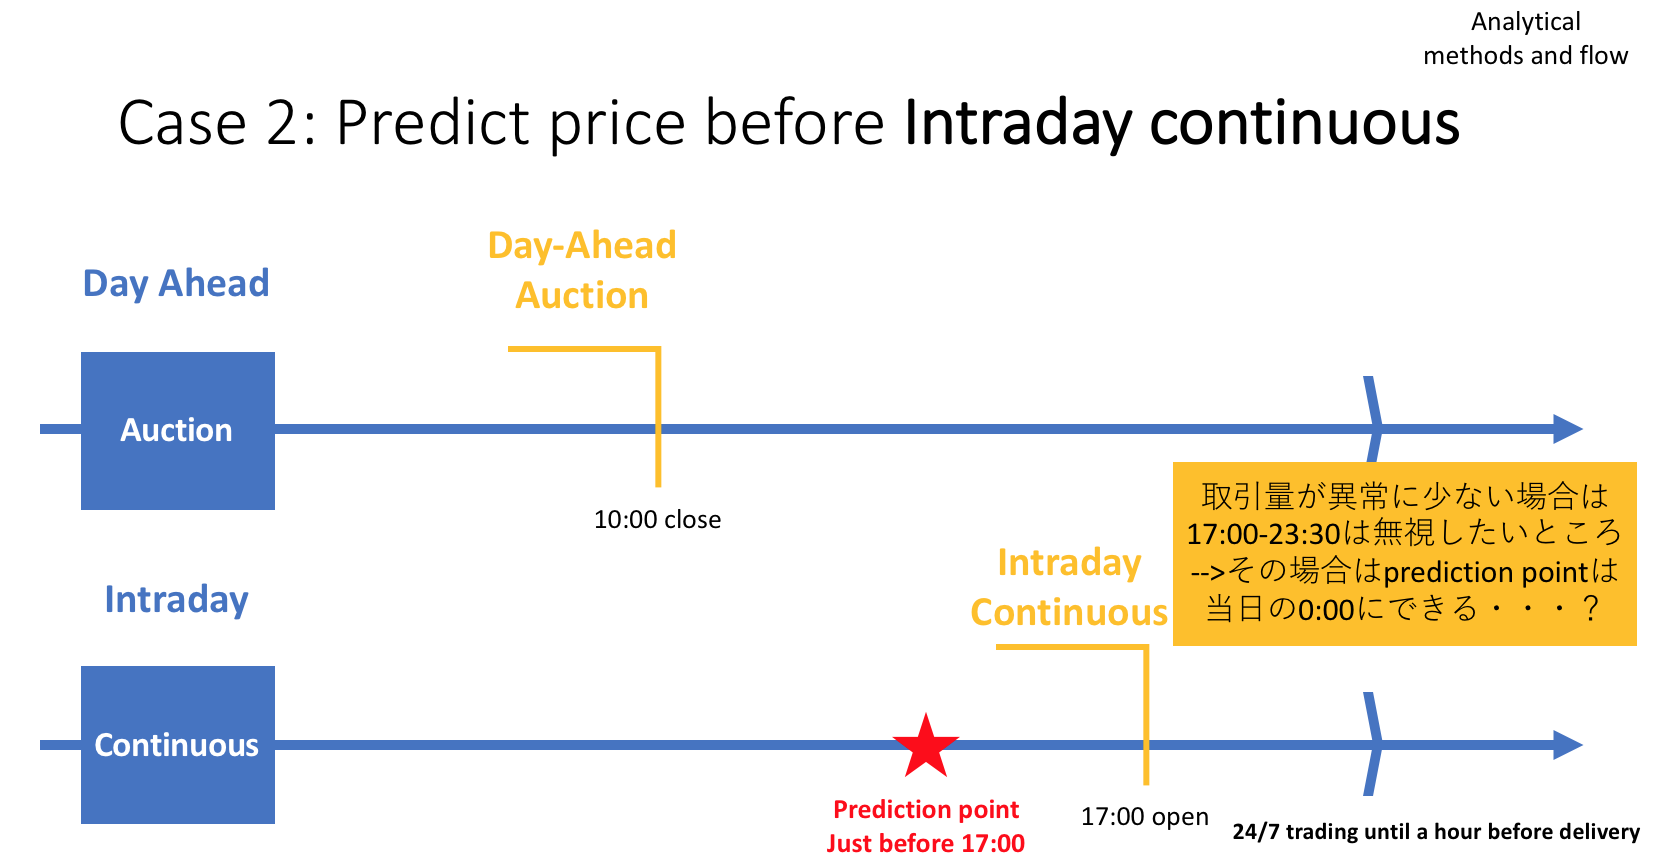

予測時点でどの特徴量が存在しうるか整理する

- Close priceは外す (Target) 
- Spot_price & volume: そのまま(Spot価格確定後の予測)
- 電力需要ピーク情報: そのまま（翌日予測）
- その他: <p>
    ① block_date_numを2日分ずらす<p>
        ※ここでの論点はIntraday開始直後に取引される17:00から24:00までのアイテムが１日ずらしつかえないということ。つまり、17:00-24:00を勘案すると2日ずらす必要がある。(今後調整するかも)
        
    
    その上で更に、直前のスロットの情報は相関が高いので<p>
    ② HHを1スロット分ずらす <p>
    ③ その他はseasonality検証後に必要に応じて追加 <p>
    ④ lag_feature生成後元の特徴量は全て削除 <p>

# Feature Engineering

<EDA前にやること><p>
【時系列分析の基本】定常性とホワイトノイズを分かりすく解説 <p>
https://ai-trend.jp/basic-study/time-series-analysis/time-series-analysis-stationaly-noise/
    
時系列データに定常性を持たせて解析する方法
https://ai-trend.jp/basic-study/time-series-analysis/stationarity/

機械学習による株価予測　いろはの”い”
https://qiita.com/blog_UKI/items/25dc1c2559c61890a449

## Lag-features (Avoiding data leakage)

※Infinity value will be happen with Downcast preprocessing. ("Total" column)

In [64]:
# Check the remaining memory on PC
import gc
gc.collect()

53

※ ラグ特徴量が必要ないものと"Close"(target)は外す

In [65]:
lag_columns = all_data.columns.drop(['Date', 'Time', 'HH', 'Close', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)', 'date_block_num', 'month'])

In [66]:
lag_columns

Index(['Open', 'High', 'Low', 'Average', 'Volume(MWh/h)',
       'Volume(Tick count)'],
      dtype='object')

厳密にすると、17:00〜23:30は予測時点では１日前の情報は手に入らない
Prediction pointを「前日の17:00直前」とする場合は、以下の手当が必要
予測時点の前後でDaylag1とDaylag2の参照を変える
もともとのカラムに格納し、カラム名を変更する
Daylag1とDaylag2を削除する

※一旦は２日ずらして対応する (ただし、Closeとの相関は当然下がるため改善の余地有り)

In [67]:
def generate_lag_day(train, days, cols):
   
    for col in cols:
        for day in days:
           # copy the columns that need to generate lag features
            train_shift = train[['date_block_num', 'HH', col]].copy()

            # Change the name of  lag features
            train_shift.columns = ['date_block_num', 'HH', col+'_Daylag_'+ str(day)]
            train_shift['date_block_num'] += day
            train = pd.merge(train, train_shift, how='left', on=['date_block_num', 'HH'])
   
    return train

In [68]:
all_data_lagged = generate_lag_day(all_data, [2], lag_columns)

In [69]:
all_data_lagged = all_data_lagged.drop(lag_columns, axis=1)

In [70]:
print(all_data_lagged.isnull().sum().head(20))

Date                            0
HH                              0
Close                           0
Time                            0
Sell_volume(kWh)                0
Buy_volume(kWh)                 0
Total_volume(kWh)               0
System_price(Yen/kWh)           0
Price_Tohoku(Yen/kWh)           0
Price_Tokyo(Yen/kWh)            0
date_block_num                  0
month                           0
Open_Daylag_2                  96
High_Daylag_2                  96
Low_Daylag_2                   96
Average_Daylag_2               96
Volume(MWh/h)_Daylag_2         96
Volume(Tick count)_Daylag_2    96
dtype: int64


NaN was generated only on 96 (48 * 2) timeslots on the firstday 2016/04/01　and 2016/04/02 --> OK 

In [71]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum().head(20))

Date                           0
HH                             0
Close                          0
Time                           0
Sell_volume(kWh)               0
Buy_volume(kWh)                0
Total_volume(kWh)              0
System_price(Yen/kWh)          0
Price_Tohoku(Yen/kWh)          0
Price_Tokyo(Yen/kWh)           0
date_block_num                 0
month                          0
Open_Daylag_2                  0
High_Daylag_2                  0
Low_Daylag_2                   0
Average_Daylag_2               0
Volume(MWh/h)_Daylag_2         0
Volume(Tick count)_Daylag_2    0
dtype: int64


In [73]:
def generate_lag_HH(train, HHs, cols):
    for col in cols:

        for HH in HHs:
            # copy the columns that need to generate lag features
            train_shift = train[['date_block_num', 'HH', col]].copy()

            # Change the name of  lag features
            train_shift.columns = ['date_block_num', 'HH', col+'_HHlag_'+ str(HH)]
            train_shift['HH'] += HH
            
            # Adjust HH
            for i in train['HH']:
                if i == 49:
                    train_shift['HH'] == 1
                    train_shift['date_block_num'] += 1

            # Merge lagged features into the original df
            train = pd.merge(train, train_shift, how='left', on=['date_block_num', 'HH'])
    return train

※ラグ特徴量が必要ないものと"Close"(target)は再度外す

In [74]:
lag_columns = all_data_lagged.columns.drop(['Date', 'Time', 'HH', 'Close', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)', 'date_block_num', 'month'])

In [75]:
lag_columns

Index(['Open_Daylag_2', 'High_Daylag_2', 'Low_Daylag_2', 'Average_Daylag_2',
       'Volume(MWh/h)_Daylag_2', 'Volume(Tick count)_Daylag_2'],
      dtype='object')

In [76]:
# Generate lag for 48h(1day) and 49h(1day + 1 slot) before
all_data_lagged = generate_lag_HH(all_data_lagged, [1], lag_columns)

In [77]:
print(all_data_lagged.isnull().sum().tail())

High_Daylag_2_HHlag_1                  1736
Low_Daylag_2_HHlag_1                   1736
Average_Daylag_2_HHlag_1               1736
Volume(MWh/h)_Daylag_2_HHlag_1         1736
Volume(Tick count)_Daylag_2_HHlag_1    1736
dtype: int64


In [78]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum().tail())

High_Daylag_2_HHlag_1                  0
Low_Daylag_2_HHlag_1                   0
Average_Daylag_2_HHlag_1               0
Volume(MWh/h)_Daylag_2_HHlag_1         0
Volume(Tick count)_Daylag_2_HHlag_1    0
dtype: int64


## Standardise with Log-features (対数化)

[Mission]
対数の逆対数変換をして元の数値を得ること
-->グラフで可視化してみる (Closeと対数化Close)線グラフ
-->逆対数の数式を手動で適用してみる
-->

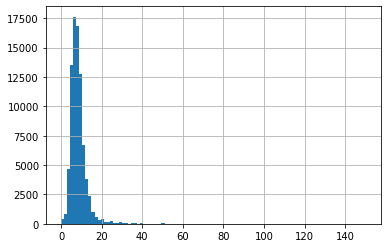

In [81]:
all_data_lagged["Close"].hist(bins=100);

In [82]:
all_data_lagged.columns

Index(['Date', 'HH', 'Close', 'Time', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)', 'date_block_num', 'month', 'Open_Daylag_2',
       'High_Daylag_2', 'Low_Daylag_2', 'Average_Daylag_2',
       'Volume(MWh/h)_Daylag_2', 'Volume(Tick count)_Daylag_2',
       'Open_Daylag_2_HHlag_1', 'High_Daylag_2_HHlag_1',
       'Low_Daylag_2_HHlag_1', 'Average_Daylag_2_HHlag_1',
       'Volume(MWh/h)_Daylag_2_HHlag_1',
       'Volume(Tick count)_Daylag_2_HHlag_1'],
      dtype='object')

In [83]:
cols = ['Close', 'Time', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)', 'Price_Tokyo(Yen/kWh)']

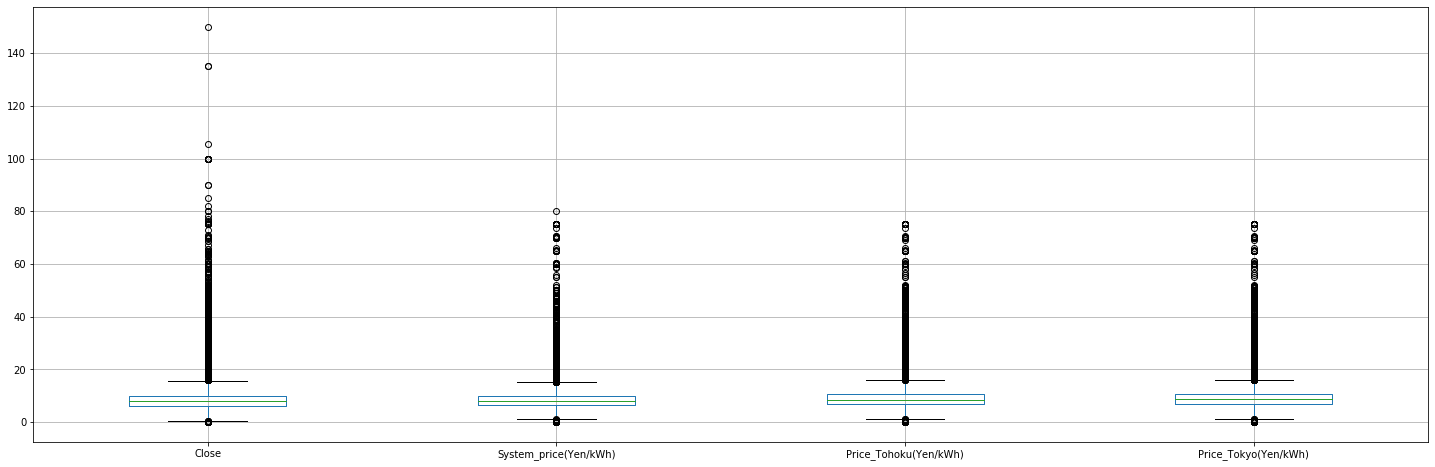

In [84]:
plt.figure(figsize = (25,8))
all_data_lagged[cols].boxplot()
plt.show()

Features seem to be positive skew, and have different scale. --> Need to standardise

In [85]:
all_data_log1 = all_data_lagged[['Date', 'Time', 'HH', 'date_block_num', 'month']]
all_data_log2 = all_data_lagged.drop(['Date', 'Time', 'HH', 'date_block_num', 'month'], axis=1)

In [86]:
# logarithmic transformation for standardised
# 0と負の値を含む列があるので、PowerTransformer()のYeo-Johnson変換を適用する (対数変換の一種)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
pt.fit(all_data_log2)

all_data_log2_transformed = all_data_log2

cols = all_data_log2_transformed.columns
all_data_log2_transformed = pt.transform(all_data_log2_transformed)
all_data_log2_transformed = pd.DataFrame(all_data_log2_transformed)
all_data_log2_transformed.columns = cols

In [89]:
all_data_log = pd.concat([all_data_log1, all_data_log2_transformed], axis=1)

In [90]:
all_data_log.head()

,Date,Time,HH,date_block_num,month,Close,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_2,High_Daylag_2,Low_Daylag_2,Average_Daylag_2,Volume(MWh/h)_Daylag_2,Volume(Tick count)_Daylag_2,Open_Daylag_2_HHlag_1,High_Daylag_2_HHlag_1,Low_Daylag_2_HHlag_1,Average_Daylag_2_HHlag_1,Volume(MWh/h)_Daylag_2_HHlag_1,Volume(Tick count)_Daylag_2_HHlag_1
0,2016-04-01,00:00:00,1,1.0,4,-0.074394,-1.291817,-1.673085,-1.633175,-0.452571,-0.625136,-0.647312,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815
1,2016-04-01,00:30:00,2,1.0,4,-0.147622,-1.183496,-1.640136,-1.590106,-0.551545,-0.766843,-0.796254,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815
2,2016-04-01,01:00:00,3,1.0,4,-0.222905,-1.166207,-1.645640,-1.612373,-0.551545,-0.766843,-0.796254,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815
3,2016-04-01,01:30:00,4,1.0,4,-0.271054,-1.200211,-1.650198,-1.610221,-0.585289,-0.899376,-0.936160,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815
4,2016-04-01,02:00:00,5,1.0,4,-0.222905,-1.214961,-1.653106,-1.532537,-0.467026,-0.672824,-0.697360,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815


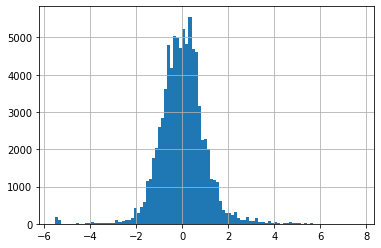

In [91]:
all_data_log["Close"].hist(bins=100);

※ Confirm whether inverse transform works appropriately, or not

In [92]:
all_data_log_inverse1 = all_data_log[['Date', 'Time', 'HH', 'date_block_num', 'month']]
all_data_log_inverse2 = all_data_log.drop(['Date', 'Time', 'HH', 'date_block_num', 'month'], axis=1)
all_data_log_inverse2.head()

,Close,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_2,High_Daylag_2,Low_Daylag_2,Average_Daylag_2,Volume(MWh/h)_Daylag_2,Volume(Tick count)_Daylag_2,Open_Daylag_2_HHlag_1,High_Daylag_2_HHlag_1,Low_Daylag_2_HHlag_1,Average_Daylag_2_HHlag_1,Volume(MWh/h)_Daylag_2_HHlag_1,Volume(Tick count)_Daylag_2_HHlag_1
0,-0.074394,-1.291817,-1.673085,-1.633175,-0.452571,-0.625136,-0.647312,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815
1,-0.147622,-1.183496,-1.640136,-1.590106,-0.551545,-0.766843,-0.796254,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815
2,-0.222905,-1.166207,-1.645640,-1.612373,-0.551545,-0.766843,-0.796254,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815
3,-0.271054,-1.200211,-1.650198,-1.610221,-0.585289,-0.899376,-0.936160,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815
4,-0.222905,-1.214961,-1.653106,-1.532537,-0.467026,-0.672824,-0.697360,-4.633993,-8.761328,-3.341479,-6.906421,-2.699031,-3.346468,-3.416368,-3.848532,-2.755932,-3.5556,-2.343775,-2.617815


In [93]:
pt.fit(all_data_log2)

cols = all_data_log_inverse2.columns
all_data_log_inverse2 = pt.inverse_transform(all_data_log2_transformed)
all_data_log_inverse2 = pd.DataFrame(all_data_log_inverse2)
all_data_log_inverse2.columns = cols

In [94]:
all_data_log_inverse = pd.concat([all_data_log_inverse1, all_data_log_inverse2], axis=1)

In [95]:
all_data_log_inverse.head()

,Date,Time,HH,date_block_num,month,Close,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_2,High_Daylag_2,Low_Daylag_2,Average_Daylag_2,Volume(MWh/h)_Daylag_2,Volume(Tick count)_Daylag_2,Open_Daylag_2_HHlag_1,High_Daylag_2_HHlag_1,Low_Daylag_2_HHlag_1,Average_Daylag_2_HHlag_1,Volume(MWh/h)_Daylag_2_HHlag_1,Volume(Tick count)_Daylag_2_HHlag_1
0,2016-04-01,00:00:00,1,1.0,4,7.69,5077000.0,2120500.0,675500.0,6.61,6.69,6.69,0.0,-2.220446e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-04-01,00:30:00,2,1.0,4,7.45,5621500.0,2239000.0,755500.0,6.34,6.34,6.34,0.0,-2.220446e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-04-01,01:00:00,3,1.0,4,7.21,5710500.0,2219000.0,713500.0,6.34,6.34,6.34,0.0,-2.220446e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-04-01,01:30:00,4,1.0,4,7.06,5536000.0,2202500.0,717500.0,6.25,6.03,6.03,0.0,-2.220446e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-04-01,02:00:00,5,1.0,4,7.21,5461000.0,2192000.0,870500.0,6.57,6.57,6.57,0.0,-2.220446e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


一部 ("High_Daylag_2"等)がバグってるけど、一旦は問題なし
-->対数化チェック完了！

# EDA (for all_data)

## Check the Correlation between features
    -->相関が極めて高いものはグルーピングして訓練データ内でダブらないようにする


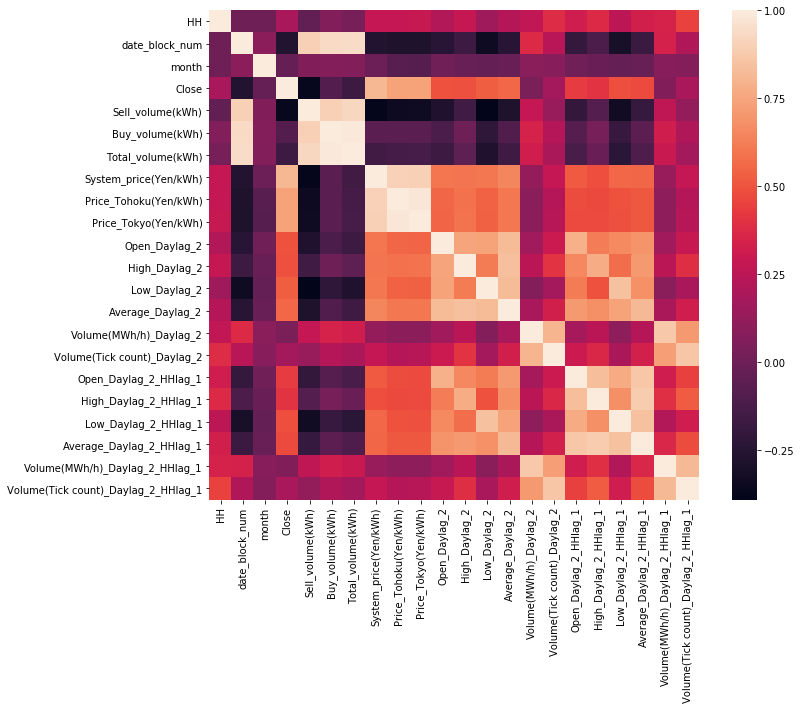

In [96]:
# correlation matrix
corrmat = all_data_log.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True);

## Check the correlation of features with the target
    -->上位相関(正と負)はピックアップして更に数値にしてみる

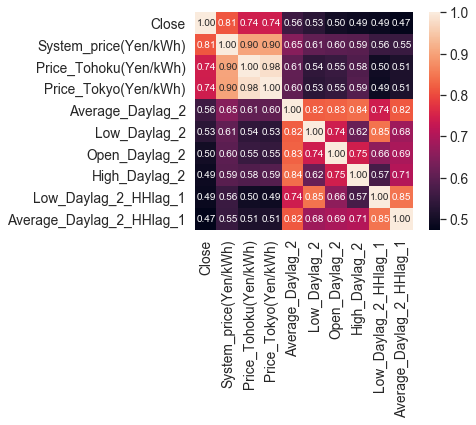

In [97]:
# revenue correlation matrix
k = 10 # The number of variables on the heatmap
cols = corrmat.nlargest(k, 'Close')['Close'].index
cm = np.corrcoef(all_data_log[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

※ちなみにDay1_lagの場合、Ave=0.65, Low=0.62, Open=0.57, Low_HHlag=0.57,HIgh=0.56,Ave_HHlag=0.55<p>
(Day2の場合、相関が結構下がるため、改善の余地あり)

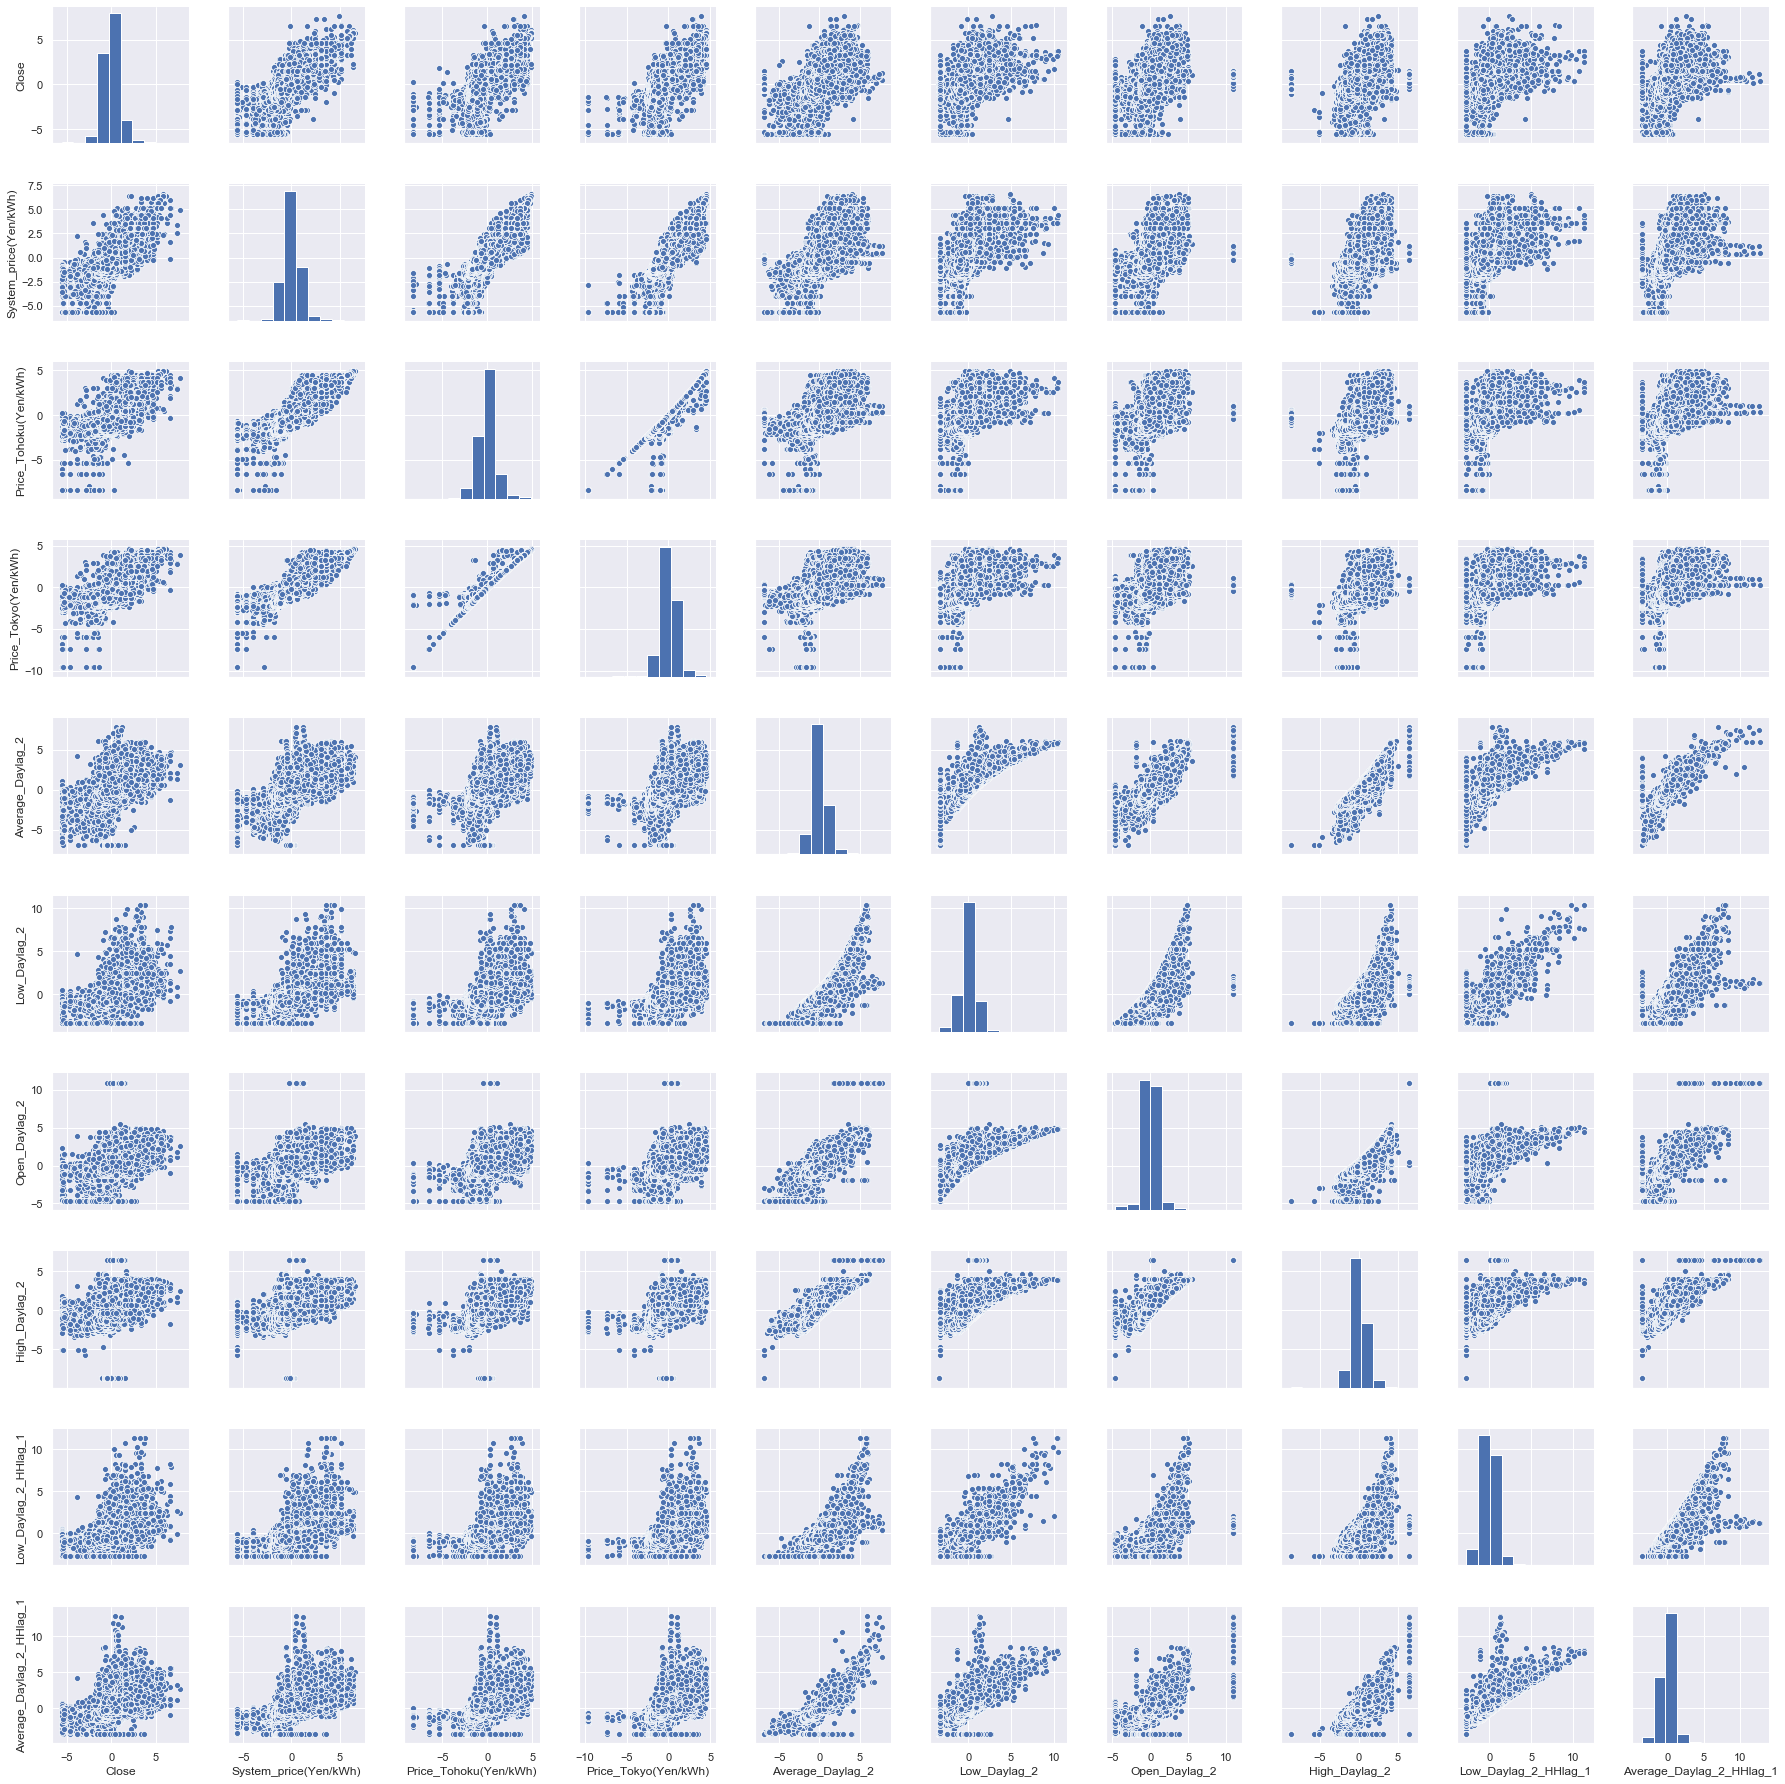

In [98]:
# scatterplot
sns.set()
cols = ['Close', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)', 'Price_Tokyo(Yen/kWh)', 'Average_Daylag_2',
        'Low_Daylag_2', 'Open_Daylag_2', 'High_Daylag_2', 'Low_Daylag_2_HHlag_1', 'Average_Daylag_2_HHlag_1']
sns.pairplot(all_data_log[cols], size=2.5)
plt.show()

<メモ><p>
    - 外れ値は見られるが線形の関係が見られる
    - OpenとCloseの相関は見られないが、OpenとHighはなぜか相関が高い。（Openで高値がつきやすい？）
    - TokyoとTohokuは高い相関が見られる

外れ値はここで処理しておく --> ただし一概に外れ値を除去するべきとは限らない。要検討 <P>
全体のEDAで気になる点がでれば個別にEDA

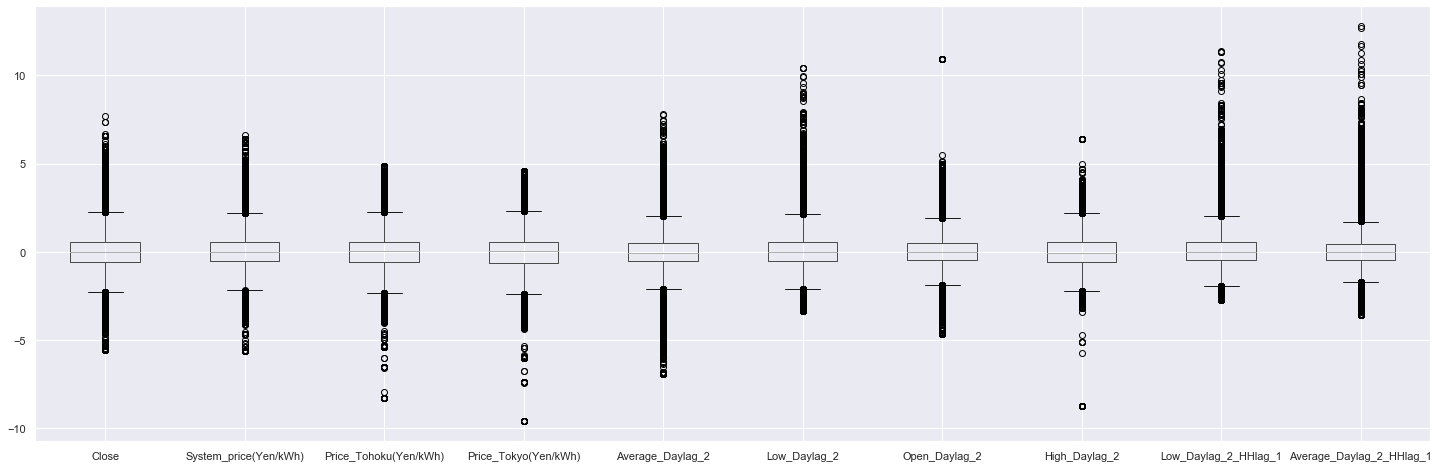

In [99]:
plt.figure(figsize = (25,8))
all_data_log[cols].boxplot()
plt.show()

スケールも整っている

# Training Models with "all_data"

ここですべきことはクロスバリデーションでのモデル構築

TimeSeries validation from scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

参照(ブログ)
https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

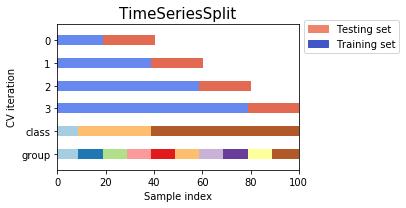

Split all_data set based on time-base

In [101]:
from sklearn.model_selection import TimeSeriesSplit

n_splits=10
test_size=48

tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=48)


In [102]:
X = all_data_log.drop(['Close', 'Date', 'Time'], axis=1)
y = all_data_log.Close

以下のループで

- 10 fold validation train/test setへ分割
- それぞれモデルへ適用して、Evaluation(RMSE/MAE)をする
- 予測結果をリストへ返す(グラフ用)
- Evaluationをリストへ返す-->各RMSE/MAEの平均を取る --> 逆対数変換をして評価(評価用)

[Linear Regression]

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
#fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))


for train_index, valid_index in tscv.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
#     print("TRAIN:", train_index, "TEST:", valid_index)
    print("Modelling")
    modelLine = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1).fit(X_train, y_train)
    y_pred = modelLine.predict(X_valid)
    true_values = y_valid.values
    training_accuracy.append(modelLine.score(X_train, y_train))     
    valid_accuracy.append(modelLine.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

#     # Graph for comparison between actual and predictioin
#     y_pred = pd.Series(y_pred)
#     y_pred.plot(ax=ax, label="Prediction")

print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

#ax.set(xlabel="Time", ylabel="Logarithmic_Price")
# plt.legend();

Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Training_accuracy: [0.6725651327316648, 0.6725626997840801, 0.6725569540432494, 0.6729422128360997, 0.673145540225405, 0.6741661139955665, 0.674347650002346, 0.6753807517282728, 0.6757043295410952, 0.6772092802386455]
Training_accuracy: 0.6740580665126424
Valid_accuracy: [0.5030657084220427, 0.10103852252307577, 0.19728043325210698, 0.2546798077476271, 0.22287065056777866, 0.15587062536615492, 0.7442532468575209, 0.6751832761666721, 0.7464639820481898, 0.5024142497833926]
Valid_accuracy: 0.4103120502734562
RMSE: [0.8361094527117946, 0.7345105557617728, 0.8142556956429733, 0.7471624389951435, 1.9710366038794258, 1.35743450041184, 1.0398524331795955, 0.991489063726185, 0.6542466897740142, 1.1706044640479933]
RMSE: 1.0316701898130738
MAE: [0.6187866442844817, 0.6397500773146582, 0.6667760985126794, 0.6303099707289092, 1.5847843585048007, 1.115770396586049, 0.8332526004414156, 0.714995539861

[XGBoost]

In [104]:
from xgboost import XGBRegressor

rmse = []
mae = []

for train_index, valid_index in tscv.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    print("Modelling")
    modelXGB = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=200, colsample_bytree=0.1).fit(X_train, y_train)   
    y_pred = modelXGB.predict(X_valid)
    true_values = y_valid.values
    training_accuracy.append(modelLine.score(X_train, y_train))     
    valid_accuracy.append(modelLine.score(X_valid, y_valid))  
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))
    
print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Training_accuracy: [0.6725651327316648, 0.6725626997840801, 0.6725569540432494, 0.6729422128360997, 0.673145540225405, 0.6741661139955665, 0.674347650002346, 0.6753807517282728, 0.6757043295410952, 0.6772092802386455, 0.6724848712177884, 0.6724862925012752, 0.6724934472782826, 0.672888974504401, 0.6731042548562864, 0.6741605436147836, 0.6743413712388588, 0.6753761769149016, 0.6756997787332794, 0.6772092802386455]
Training_accuracy: 0.6740412828112464
Valid_accuracy: [0.5030657084220427, 0.10103852252307577, 0.19728043325210698, 0.2546798077476271, 0.22287065056777866, 0.15587062536615492, 0.7442532468575209, 0.6751832761666721, 0.7464639820481898, 0.5024142497833926, 0.5077182222658919, 0.13984668009353496, 0.22095592230119332, 0.28445094631880763, 0.24152971216412034, 0.1564733638686292, 0.7453860206672756, 0.6755440313569664, 0.7558659286873624, 0.5024142497833926]
Valid_accuracy: 0.41

[ARIMA]

In [105]:
# 1,1,2 ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

modelARIMA = ARIMA(y, order=(1,1,2))
model_fit = modelARIMA.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                83328
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -68480.083
Date:                Sat, 27 Feb 2021   AIC                         136968.166
Time:                        23:31:41   BIC                         137005.488
Sample:                             0   HQIC                        136979.586
                              - 83328                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8677      0.002    524.933      0.000       0.864       0.871
ma.L1         -1.3395      0.003   -524.444      0.000      -1.345      -1.335
ma.L2          0.3436      0.002    139.526      0.0

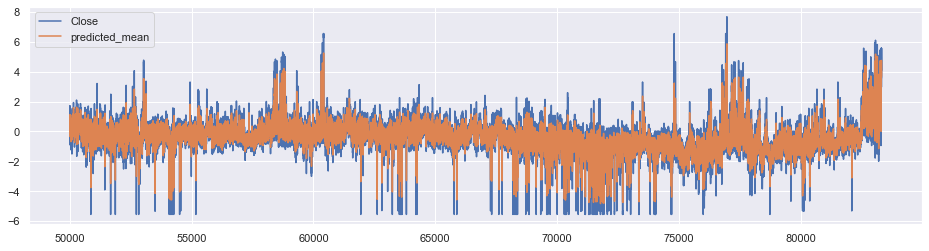

In [106]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))

y_pred = model_fit.predict()
y[50000:].plot()
y_pred[50000:].plot()
plt.legend();

[RandomForest]※時間がかかるので注意

In [275]:
# from sklearn.ensemble import RandomForestRegressor

# rmse = []
# mae = []

# for train_index, valid_index in tscv.split(X):
#     X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
#     y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
#     print("Modelling")
#     modelRF = RandomForestRegressor(n_jobs = -1, min_samples_leaf = 5, n_estimators=200).fit(X_train, y_train)    
#     y_pred = modelRF.predict(X_valid)
#     true_values = y_valid.values
#     rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
#     mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
# print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
# print("MAE: {}".format(np.mean(mae)))

[SVM] -->小数点に対応していないため使用不可

In [ ]:
# modeling with 3 type
#from sklearn import svm
#modelSVM_ST = svm.LinearSVC(penalty='l2', loss='hinge', dual=True, tol=1e-3).fit(x_train_norm, y_train)
#modelSVM_L2 = svm.LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3).fit(x_train, y_train)
#modelSVM_L1 = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=1e-3).fit(x_train, y_train)
#modelSVC = SVC(kernel='linear').fit(X_train, y_train)   

[Logistics regression] -->小数点に対応していないため使用不可

In [376]:
# from sklearn.linear_model import LogisticRegression
# modelCLF = LogisticRegression(penalty='l2', solver='sag', random_state=0).fit(X_train, y_train)   

[Prophet] <p>
Document of Prophet from Facebook
https://peerj.com/preprints/3190/

日本語の解説 (公式ではないが結構細かい)
https://mikiokubo.github.io/analytics/15forecast.html

Prophet用にデータを加工する <p>
①日時を残す (YYYYMMDD + Time)にする <p>
②列名を変更 (datetime -->dt, target-->y) <p>
③ date_block_num 1736で分割

In [107]:
# Copy all data for prophet
all_data_log_prop = all_data_log

In [108]:
all_data_log_prop["Date"] = all_data_log_prop["Date"].astype(str)
all_data_log_prop["Time"] = all_data_log_prop["Time"].astype(str)

In [109]:
all_data_log_prop ["DateTime"] = pd.to_datetime(all_data_log_prop["Date"].str.cat( all_data_log_prop["Time"], sep=" "))

In [110]:
all_data_log_prop.tail()

,Date,Time,HH,date_block_num,month,Close,Sell_volume(kWh),Buy_volume(kWh),Total_volume(kWh),System_price(Yen/kWh),Price_Tohoku(Yen/kWh),Price_Tokyo(Yen/kWh),Open_Daylag_2,High_Daylag_2,Low_Daylag_2,Average_Daylag_2,Volume(MWh/h)_Daylag_2,Volume(Tick count)_Daylag_2,Open_Daylag_2_HHlag_1,High_Daylag_2_HHlag_1,Low_Daylag_2_HHlag_1,Average_Daylag_2_HHlag_1,Volume(MWh/h)_Daylag_2_HHlag_1,Volume(Tick count)_Daylag_2_HHlag_1,DateTime
83323,2020-12-31,21:30:00,44,1736.0,12,5.569199,0.516615,1.185998,0.974389,4.056114,3.357070,3.248023,2.926693,2.278365,2.465330,3.032467,1.595710,1.873491,3.337397,2.787823,5.412945,4.202575,1.437498,1.586717,2020-12-31 21:30:00
83324,2020-12-31,22:00:00,45,1736.0,12,4.406511,0.453292,1.169933,0.929288,4.814043,3.636565,3.498930,3.465169,2.780862,1.219697,3.618730,1.919152,2.296077,2.782534,2.159196,2.419142,3.140255,1.593184,1.881115,2020-12-31 22:00:00
83325,2020-12-31,22:30:00,46,1736.0,12,4.151522,0.465199,1.121474,0.937738,4.456593,3.636565,3.498930,2.857458,2.331763,2.465330,3.187335,1.419202,1.828055,3.337397,2.787823,1.184806,3.941628,1.921400,2.328711,2020-12-31 22:30:00
83326,2020-12-31,23:00:00,47,1736.0,12,3.833666,0.430315,1.106149,0.912668,4.056114,3.357070,3.248023,2.064318,1.690789,-0.775821,1.823503,1.946873,2.384242,2.712377,2.222614,2.419142,3.344466,1.415455,1.833558,2020-12-31 23:00:00
83327,2020-12-31,23:30:00,48,1736.0,12,2.979503,0.428168,1.055004,0.910963,3.070161,2.622831,2.574092,1.351503,1.240111,-0.719797,1.311116,2.236252,2.164553,1.927669,1.508052,-0.667363,1.710744,1.949678,2.423275,2020-12-31 23:30:00


In [111]:
# train dataset for prophet
df_prop = all_data_log_prop.rename(columns={'DateTime': 'ds', 'Close': 'y'})

In [112]:
from fbprophet import Prophet
modelProp = Prophet().fit(df_prop)

[引用:パラメータの解説]
以下の例では、initialが730日なので、729日までの情報を用いて、その後365(horizon)日の予測を行い、本当の値との誤差を評価し、次いで730+180(period)日までの情報を用いて、その後365日の予測を行い評価し、という手順を最後の日まで繰り返す。(2905-730-365)/180 = 10.05であるので、11回の予測を行い評価することになる。cross_validationは、交差検証用のデータフレームを返す。<p>
    -->今回はTotal1736に対し、InInitial1725daysを用いて最初にhorison1dayを予測し、その後Period1day間隔で予測を繰り返す<p>
    -->つまり(1736-1725-1)/1 = 10times predictions

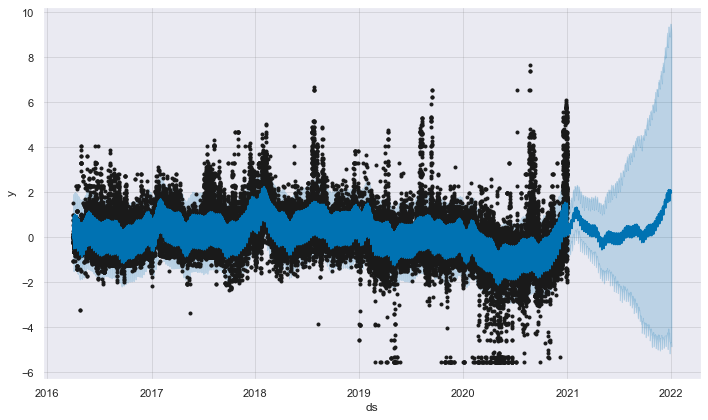

In [113]:
future = modelProp.make_future_dataframe(periods=365, freq='D')
forecast = modelProp.predict(future)
modelProp.plot(forecast);

In [114]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(modelProp, initial='1725days', period='1days', horizon = '1days')
df_cv.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2020-12-21 23:30:00 and 2020-12-30 23:30:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-12-22 00:00:00,-0.082018,-0.939595,0.875531,0.823307,2020-12-21 23:30:00
1,2020-12-22 00:30:00,-0.107643,-1.023383,0.757573,0.614843,2020-12-21 23:30:00
2,2020-12-22 01:00:00,-0.118693,-1.077232,0.815382,-0.407258,2020-12-21 23:30:00
3,2020-12-22 01:30:00,-0.117595,-1.043978,0.773795,-0.216550,2020-12-21 23:30:00
4,2020-12-22 02:00:00,-0.108520,-1.014244,0.803999,-0.356620,2020-12-21 23:30:00


In [115]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, rolling_window=0)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 00:30:00,4.240663,2.059287,1.773797,1.076963,1.068056,0.4
1,0 days 01:00:00,3.402305,1.844534,1.631645,1.075548,1.113606,0.4
2,0 days 01:30:00,3.126688,1.768244,1.525514,0.936458,1.004810,0.3
3,0 days 02:00:00,3.268852,1.807997,1.635082,0.944378,1.014166,0.1
4,0 days 02:30:00,4.461348,2.112190,1.802485,0.964432,1.005320,0.1


In [116]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
43,0 days 22:00:00,8.091772,2.844604,2.175544,0.760315,0.825952,0.4
44,0 days 22:30:00,8.258962,2.873841,2.296948,0.801937,0.919915,0.2
45,0 days 23:00:00,6.600523,2.569148,2.321369,0.918436,0.970387,0.2
46,0 days 23:30:00,6.962590,2.638672,2.170257,1.011509,1.020014,0.2
47,1 days 00:00:00,5.804505,2.409254,1.928921,1.065853,1.078289,0.3


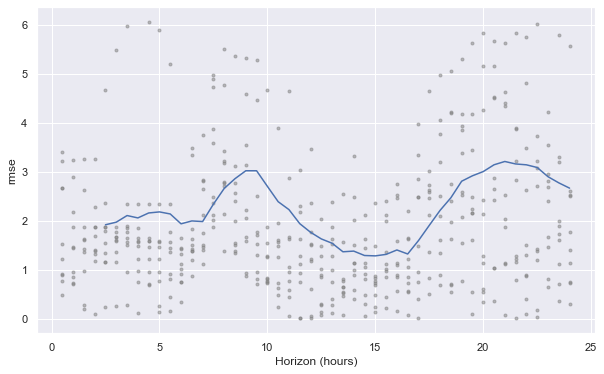

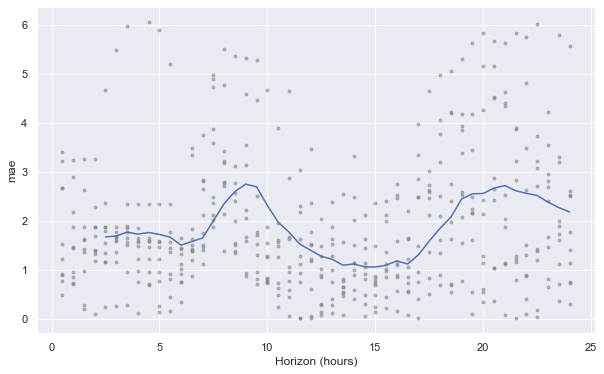

In [117]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='rmse');
plot_cross_validation_metric(df_cv, metric='mae');

課題
- RMSEは実数(逆対数変換)で算出したほうがわかりやすいので調整 ※全てのモデル作成後の課題
- モデルごとに実数と予測値の比較グラフ
- 各モデルのRMSE/MAE比較グラフ

[RMSE]

In [ ]:
y_preds_model_Line = pd.DataFrame(modelLine.predict(x_train)).round()
y_valid_model_Line = pd.DataFrame(modelLine.predict(x_valid)).round()

y_preds_model_RF = pd.DataFrame(modelRF.predict(x_train)).round()
y_valid_model_RF = pd.DataFrame(modelRF.predict(x_valid)).round()

y_preds_model_XGB = pd.DataFrame(modelXGB.predict(x_train)).round()
y_valid_model_XGB = pd.DataFrame(modelXGB.predict(x_valid)).round()

RMSEは元の数値で算出するほうが良さそう。（ラグを解除する）

※やり残していること
- Visualisation (Actual value と Precition)
- Visualisation (各RMSE/MAEの計測値) <p>
 --> Evaluationを実数で計測すること(Predictionに対して逆対数変換が必要) 

# Visualisation of the model performance 

<やりたいこと>
複数モデルを線形チャートで比較表示させたい。できれば

これらの結果を基礎として、特徴量を含めていった結果どれだけ予測精度が上がったのかを検証していく